![](https://user-images.githubusercontent.com/40379485/56939165-c72a5f80-6b41-11e9-82e6-8e0c24495d14.png)


# Fine-grained segmentation task for fashion and apparel

iMaterialist (Fashion) 2019 at FGVC6 with [dataset](https://www.kaggle.com/c/imaterialist-fashion-2019-FGVC6/overview/description)

Designers know what they are creating, but what, and how, do people really wear their products? What combinations of products are people using? In this competition, we challenge you to develop algorithms that will help with an important step towards automatic product detection – to accurately assign segmentations and attribute labels for fashion images.

Visual analysis of clothing is a topic that has received increasing attention in recent years. Being able to recognize apparel products and associated attributes from pictures could enhance the shopping experience for consumers, and increase work efficiency for fashion professionals.

We present a new clothing dataset with the goal of introducing a novel fine-grained segmentation task by joining forces between the fashion and computer vision communities. The proposed task unifies both categorization and segmentation of rich and complete apparel attributes, an important step toward real-world applications.




In [1]:
import numpy as np
import pandas as pd

import cv2
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image

from wordcloud import WordCloud

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
path = '../input/'

In [3]:
train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32


In [4]:
label_description = open(path + 'label_descriptions.json').read()
label_description = json.loads(label_description)
label_description.keys()

dict_keys(['info', 'categories', 'attributes'])

In [5]:
label_description_info = label_description['info']
label_description_categories = pd.DataFrame(label_description['categories'])
label_description_attributes = pd.DataFrame(label_description['attributes'])

In [6]:
label_description_info

{'year': 2019,
 'version': '1.0',
 'description': 'The 2019 FGVC^6 iMaterialist Competition - Fashion track dataset.',
 'contributor': 'iMaterialist Fashion Competition group',
 'url': 'https://github.com/visipedia/imat_comp',
 'date_created': '2019-04-19 12:38:27.493919'}

In [7]:
label_description_categories

,id,level,name,supercategory
0,0,2,"shirt, blouse",upperbody
1,1,2,"top, t-shirt, sweatshirt",upperbody
2,2,2,sweater,upperbody
3,3,2,cardigan,upperbody
4,4,2,jacket,upperbody
5,5,2,vest,upperbody
6,6,2,pants,lowerbody
7,7,2,shorts,lowerbody
8,8,2,skirt,lowerbody
9,9,2,coat,wholebody


In [8]:
label_description_attributes

,id,level,name,supercategory
0,0,1,above-the-hip (length),length
1,1,1,hip (length),length
2,2,1,micro (length),length
3,3,1,mini (length),length
4,4,1,above-the-knee (length),length
5,5,1,knee (length),length
6,6,1,below the knee (length),length
7,7,1,midi,length
8,8,1,maxi (length),length
9,9,1,floor (length),length


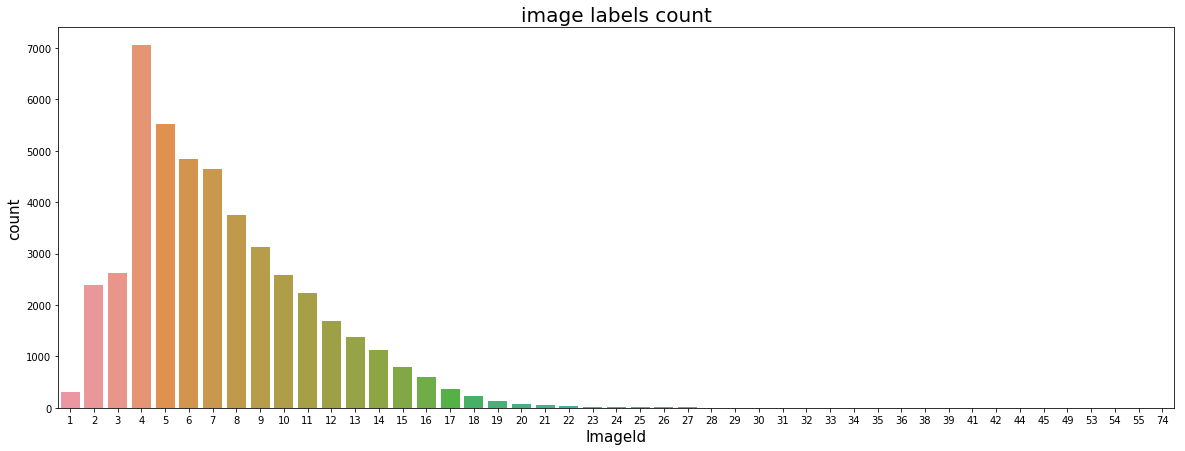

In [9]:
train_df_ImageId_count = train_df['ImageId'].value_counts()
plt.figure(figsize=(20, 7))
plt.title('image labels count', size=20)
plt.xlabel('', size=15);plt.ylabel('', size=15);
sns.countplot(train_df_ImageId_count)
plt.show()

In [10]:
label_description_categories.shape, label_description_attributes.shape

((46, 4), (92, 4))

In [24]:
train_classid = pd.DataFrame({'ClassId':train_df['ClassId'].apply(lambda x: x[:2].replace('_', ''))})
label_merge = label_description_categories[['id', 'name']].astype(str).astype(object)

In [25]:
train_df_name = train_classid.merge(label_merge, left_on='ClassId', right_on='id', how='left')
sum1 = train_df_name.shape[0]
ratio1 = np.round(train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'})/sum1 * 100, 2)

In [26]:
train_df_name_stat = train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'}).reset_index()
train_df_name_stat['ratio(%)'] = ratio1.values
train_df_name_stat

,ClassId,name,count,ratio(%)
0,31,sleeve,59452,17.83
1,23,shoe,46374,13.91
2,33,neckline,34260,10.28
3,32,pocket,27179,8.15
4,10,dress,18739,5.62
5,1,"top, t-shirt, sweatshirt",16550,4.96
6,6,pants,12415,3.72
7,28,collar,10160,3.05
8,35,zipper,7994,2.40
9,4,jacket,7833,2.35


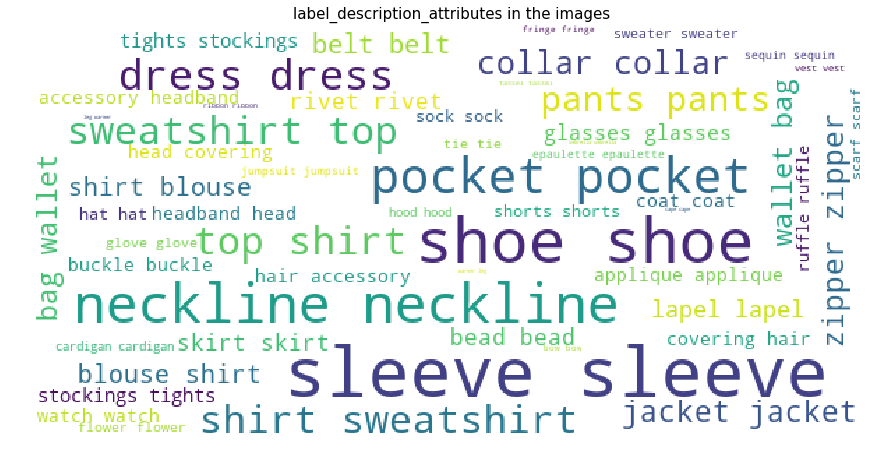

In [27]:
text = ''
for idx, name in enumerate(train_df_name_stat['name']):
    text += (name + ' ') * train_df_name_stat.loc[idx, 'count']
text = text[:-1]

wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='white').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("label_description_attributes in the images", fontsize=15)
plt.axis("off")
plt.show() 

In [28]:
train_classid = pd.DataFrame({'ClassId':[j for i in train_df['ClassId'][train_df['ClassId'].apply(lambda x: '_' in x)].apply(lambda x: x.split('_')[1:]) for j in i]})
label_merge = label_description_attributes[['id', 'name']].astype(str).astype(object)

In [29]:
train_df_name = train_classid.merge(label_merge, left_on='ClassId', right_on='id', how='left')
sum1 = train_df_name.shape[0]
ratio1 = np.round(train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'})/sum1 * 100, 3)

In [30]:
train_df_name_stat = train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'}).reset_index()
train_df_name_stat['ratio(%)'] = ratio1.values
train_df_name_stat

,ClassId,name,count,ratio(%)
0,20,symmetrical,10773,15.018
1,61,plain (pattern),8719,12.155
2,60,no special manufacturing technique,6396,8.917
3,41,regular (fit),3676,5.125
4,88,normal waist,3569,4.975
5,91,no waistline,2989,4.167
6,14,zip-up,2872,4.004
7,0,above-the-hip (length),2716,3.786
8,40,tight (fit),2224,3.100
9,3,mini (length),1951,2.720


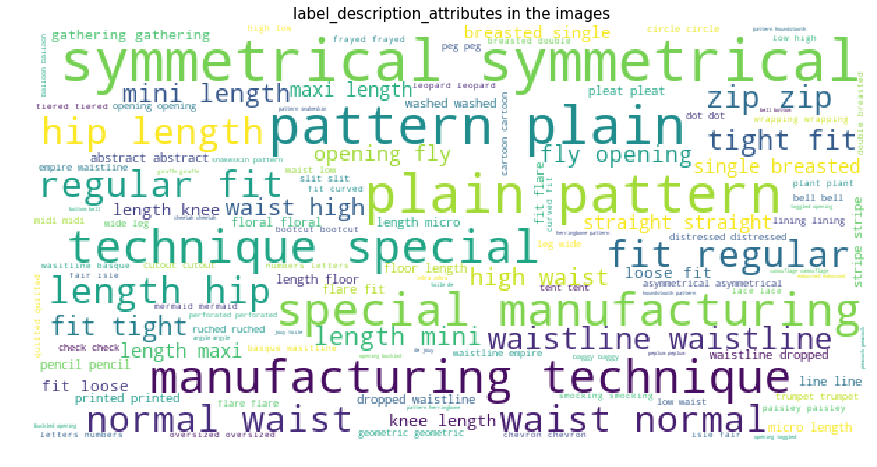

In [31]:
text = ''
for idx, name in enumerate(train_df_name_stat['name']):
    text += (name + ' ') * train_df_name_stat.loc[idx, 'count']
text = text[:-1]

wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='white').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("label_description_attributes in the images", fontsize=15)
plt.axis("off")
plt.show() 

# Image Data

In [ ]:
import os

In [ ]:
sub = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
print('The number of training image is {}.'.format(len(os.listdir(path + 'train'))))
print('train data unique length is {}.\n'.format(len(np.unique(train_df['ImageId']))))
print('The number of test image is {}.'.format(len(os.listdir(path + 'test'))))
print('test data unique length is {}.'.format(len(np.unique(sub['ImageId']))))

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.distplot(train_df.groupby('ImageId').mean().reset_index()['Height'].tolist(), bins=150).set_title('Height Histogram')

plt.subplot(3, 1, 2)
sns.distplot(train_df.groupby('ImageId').mean().reset_index()['Width'].tolist(), bins=150).set_title('Width Histogram')

plt.subplot(3, 1, 3)
sns.distplot(train_df.groupby('ImageId').mean().reset_index()['Height'] * train_df.groupby('ImageId').mean().reset_index()['Width']/10000, bins=300).set_title('Area Histogram(/10000)')

plt.show()

In [ ]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Height'] * train_df.groupby('ImageId').mean()['Width'])
print('minimum area picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Height'] * train_df.groupby('ImageId').mean()['Width'])
print('maximum area picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Height'])
print('minimum height picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Height'])
print('maximum height picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Width'])
print('minimum width picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Width'])
print('maximum width picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()